In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import ode
from scipy.optimize import *
%matplotlib inline 

In [2]:
# Equations that need to be solved for the problem 

def evalEquilibrium(X, params):
    # unpack variables 
    c      = X[0]
    thetas = X[1]
    pA     = X[2]
    # unpack params 
    d    = params[0]
    a_s  = params[1]
    a_b  = params[2]
    mu_b = params[3]
    mu_s = params[4] 
    h_b  = params[5]
    h_s  = params[6]
    # most important parameters are, first thickness and volume at the end 
    t_b  = params[7]
    Vb   = params[8]
    # the last 'parameter' is current growth 
    lamg = params[9]
    
    # A2-A3-A4
    Rc = c/np.sin(thetas)
    Rb = (d+(a_s-c)*np.tan(thetas))/(1+np.cos(thetas))
    cb = c - Rb*np.sin(thetas)
    
    # Stretches 
    lamda_b = (Rc*thetas+Rb*(np.pi-thetas)+cb)/(2*a_b)
    lamda_s = ((a_s-c)/np.cos(thetas) + Rc*thetas)/a_s 
    lamdaE_s = lamda_s/lamg
    
    # Equilibrium 
    eq1 = mu_b*h_b*(lamda_b-lamda_b**-3) + mu_s*h_s*(lamdaE_s-lamdaE_s**-3) - pA*Rc
    eq2 = mu_b*h_b*(lamda_b-lamda_b**-3) -  pA*Rb
    
    # Volume constraint 
    eq3 = t_b*(Rb**2*(np.pi-thetas)+2*Rb*cb+(c+cb)*Rb*np.cos(thetas)+Rc**2/2*(2*thetas-np.sin(2*thetas))) - Vb
    
    return [eq1,eq2,eq3]

In [3]:
# CASE 1, 30x60 mm expander, filled to final volume of 38 ml 
# just testing, not solving the growth over time 

d    = 3 # mm, distance between skin surface and bottom of the expander
a_s  = 18 # mm, distance between the center of the expander and the boundary condition, slightly wider than expander
a_b  = 15 # mm, half of width of expander   
mu_b = 20 # MPa, shear modulus of expander https://www.azom.com/properties.aspx?ArticleID=920 
mu_s = 1 # MPa, shear modulus of skin  
h_b  = 1 # mm thickness of expander 
h_s  = 1 # mm thickness of skin 
# most important 'parameters' are, first thickness and volume at the end 
# more like control variables
t_b  = 60 #mm length of the expander
Vb   = 38000 #mm^3 final volume 
# the other 'parameter' is the growth
lamg = 1 # initial growth 

params = [d, a_s, a_b, mu_b, mu_s, h_b, h_s, t_b, Vb, lamg]

# Solve for initial stretches
c0 = 10 
thetas0 = np.pi/6
pA0 = 10
X0 = [c0,thetas0,pA0]
X = fsolve(evalEquilibrium,X0,args=params)
c = X[0]
thetas = X[1]
pA = X[2]
print(c,thetas,pA)

13.919066778784837 1.291508613814102 1.7527592000182286


In [4]:

def evalSolution(X, params):
    # unpack variables 
    c      = X[0]
    thetas = X[1]
    pA     = X[2]
    # unpack params 
    d    = params[0]
    a_s  = params[1]
    a_b  = params[2]
    mu_b = params[3]
    mu_s = params[4] 
    h_b  = params[5]
    h_s  = params[6]
    # most important parameters are, first thickness and volume at the end 
    t_b  = params[7]
    Vb   = params[8]
    # the last 'parameter' is current growth 
    lamg = params[9]
    
    # A2-A3-A4
    Rc = c/np.sin(thetas)
    Rb = (d+(a_s-c)*np.tan(thetas))/(1+np.cos(thetas))
    cb = c - Rb*np.sin(thetas)
    
    # Stretches 
    lamda_b = (Rc*thetas+Rb*(np.pi-thetas)+cb)/(2*a_b)
    lamda_s = ((a_s-c)/np.cos(thetas) + Rc*thetas)/a_s 
    lamdaE_s = lamda_s/lamg
    
    
    return [Rc,Rb,cb,lamda_b,lamda_s]

In [5]:
[Rc,Rb,cb,lamda_b,lamda_s] = evalSolution(X, params)
print(Rc,Rb,cb,lamda_b,lamda_s)

14.48014278618508 13.506635756435513 0.9357856173648038 1.4875141999675325 1.8613813198590425


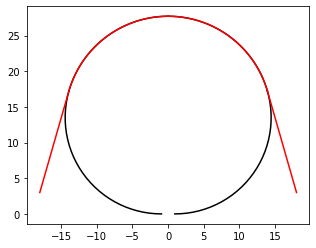

In [6]:
# PLOT 
fig, ax = plt.subplots(1, 1)

# EXPANDER 
# for the contact region 
npts = 30
theta_c_ls = np.linspace(0,thetas,npts)
zc = Rb+Rb*np.cos(thetas)
x_b_c = Rc*np.sin(theta_c_ls)
z_b_c = zc + Rc*(np.cos(theta_c_ls)-np.cos(thetas))
# for the non-contact region
theta_nc_ls = np.linspace(thetas,np.pi,npts)
x_b_nc = cb+Rb*np.sin(theta_nc_ls)
z_b_nc = Rb*(1+np.cos(theta_nc_ls))

# plot expander 
ax.plot(x_b_c,z_b_c,'k')
ax.plot(x_b_nc,z_b_nc,'k')
ax.plot(-x_b_c,z_b_c,'k')
ax.plot(-x_b_nc,z_b_nc,'k')


# SKIN 
# for the contact region, same as expander
x_s_c = x_b_c
z_s_c = z_b_c
# for the non-contact region 
x_s_nc = np.linspace(c,a_s,npts)
z_s_nc = d + (a_s - x_s_nc)*np.tan(thetas)


# plot skin
ax.plot(x_s_c,z_s_c,'r')
ax.plot(x_s_nc,z_s_nc,'r')
ax.plot(-x_s_c,z_s_c,'r')
ax.plot(-x_s_nc,z_s_nc,'r')

ax.set_aspect('equal')

In [7]:
# CASE 1, 30x60 mm expander, filled to final volume of 38 ml 
# Solving growth and inflation over time 

d    = 3 # mm, distance between skin surface and bottom of the expander
a_s  = 18 # mm, distance between the center of the expander and the boundary condition, slightly wider than expander
a_b  = 15 # mm, half of width of expander   
mu_b = 20 # MPa, shear modulus of expander https://www.azom.com/properties.aspx?ArticleID=920 
mu_s = 1 # MPa, shear modulus of skin  
h_b  = 1 # mm thickness of expander 
h_s  = 1 # mm thickness of skin 
# most important 'parameters' are, first thickness and volume at the end 
# more like control variables
t_b  = 60 #mm length of the expander
Vb   = 0 #mm^3 initial volume 
# the other 'parameter' is the growth
lamg = 1 # initial growth 
#
params = [d, a_s, a_b, mu_b, mu_s, h_b, h_s, t_b, Vb, lamg]


Vb_inflations = [6000,11000,20000,23000,26000,28000,29000,30000,32000,34000,36000,38000,38000]
time_inflations = [0,7,21,35,42,49,56,63,70,77,84,91,98,105]
n_inflations = len(time_inflations)

# initial guess for equilibrium problem 
c0 = 10 
thetas0 = np.pi/6
pA0 = 10
X0 = [c0,thetas0,pA0]

# parameter to integrate growth
kg = 0.2 # 1/day
# lam critical parameter also needed for integrate growth
lam_crit = 1.1

# store solution of total deformation and growth
# for low fidelity, max and average are the same 
nsteps = 10
lam_vec = np.zeros((n_inflations*nsteps-nsteps))
lamg_vec = np.zeros((n_inflations*nsteps-nsteps))
time_vec = np.zeros((n_inflations*nsteps-nsteps))

for ti in range(len(time_inflations)-1):
    t0 = time_inflations[ti]
    tf = time_inflations[ti+1]
    dt = (tf-t0)/(nsteps-1)
    # update volume in 'params'
    Vb = Vb_inflations[ti]
    # integrate growth
    for step in range(nsteps):
        params = [d, a_s, a_b, mu_b, mu_s, h_b, h_s, t_b, Vb, lamg]
        # solve equilibrium 
        X = fsolve(evalEquilibrium,X0,args=params)
        # evaluate total stretch 
        [Rc,Rb,cb,lamda_b,lamda_s] = evalSolution(X, params)
        # integrate growth 
        if lamda_s*lam_crit/lamg-lam_crit>0:
            lamg = lamg + dt*kg*(lamda_s*lam_crit/lamg-lam_crit)
        # reset initial guess for next loop
        X0 = X
        # store to plot at the end 
        time_vec[ti*nsteps+step] = t0 + dt*step
        lam_vec[ti*nsteps+step] = lamda_s
        lamg_vec[ti*nsteps+step] = lamg

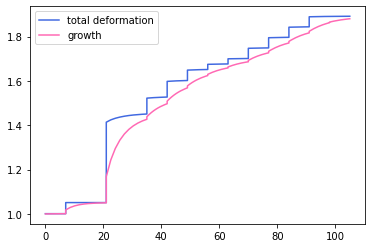

In [8]:
# PLOT 
fig, ax = plt.subplots(1, 1)
ax.plot(time_vec,lam_vec,color='royalblue',label='total deformation')
ax.plot(time_vec,lamg_vec,color='hotpink',label='growth')
ax.legend(loc=2)

## CASE 1: Anterior face 30x60mm expander, 38ml final fill volume

The setup of the model is in the previous cells, above. Here, load the combination of parameters:

$\mu$, $k$ 

And run the protocol with the low fidelity model and save to a file


In [66]:
# Load data
inputs = np.loadtxt('../LowFidelityModel/growth_low_fidelity_200T.txt')
inputs[:100,-1] *= 24
n_input = len(inputs)
print('read %i inputs'%n_input)

read 200 inputs


In [67]:

# Initial parameters [some of them will be overwritten]
d    = 3 # mm, distance between skin surface and bottom of the expander
a_s  = 18 # mm, distance between the center of the expander and the boundary condition, slightly wider than expander
a_b  = 15 # mm, half of width of expander   
mu_b = 20 # MPa, shear modulus of expander https://www.azom.com/properties.aspx?ArticleID=920 
mu_s = 1 # MPa, shear modulus of skin  
h_b  = 1 # mm thickness of expander 
h_s  = 1 # mm thickness of skin 
lam_crit = 1.1567 # prestrain 
# most important 'parameters' are, first thickness and volume at the end 
# more like control variables
t_b  = 60 #mm length of the expander
Vb   = 0 #mm^3 initial volume 
# the other 'parameter' is the growth
lamg = 1 # initial growth 
# Store initial parameters
params = [d, a_s, a_b, mu_b, mu_s, h_b, h_s, t_b, Vb, lamg]

# Inflation protocol
Vb_inflations = [6000,11000,15000,20000,23000,26000,28000,29000,30000,32000,34000,36000,38000,38000]
time_inflations = [0,7,21,35,42,49,56,63,70,77,84,91,98,105]
n_inflations = len(time_inflations)
nsteps = 40

# Loop over inputs, run model, save data 
theta_LF_AnteFace30x60mm38cc = np.zeros((n_input,n_inflations*nsteps-nsteps))
thetaG_LF_AnteFace30x60mm38cc = np.zeros((n_input,n_inflations*nsteps-nsteps))
    
for ni in range(n_input):
    # Parameters that need to be reset 
    mu_s = inputs[ni,0]
    kg = inputs[ni,1]

    # initial guess for equilibrium problem 
    c0 = 10 
    thetas0 = np.pi/6
    pA0 = 10
    X0 = [c0,thetas0,pA0]

    # store solution of total deformation and growth
    # for low fidelity, max and average are the same 
    lam_vec = np.zeros((n_inflations*nsteps-nsteps))
    lamg_vec = np.zeros((n_inflations*nsteps-nsteps))
    time_vec = np.zeros((n_inflations*nsteps-nsteps))
    
    # reset growth
    lamg = 1

    for ti in range(len(time_inflations)-1):
        t0 = time_inflations[ti]
        tf = time_inflations[ti+1]
        dt = (tf-t0)/(nsteps-1)
        # update volume in 'params'
        Vb = Vb_inflations[ti]
        # integrate growth
        for step in range(nsteps):
            params = [d, a_s, a_b, mu_b, mu_s, h_b, h_s, t_b, Vb, lamg]
            # solve equilibrium 
            X = fsolve(evalEquilibrium,X0,args=params)
            # evaluate total stretch 
            [Rc,Rb,cb,lamda_b,lamda_s] = evalSolution(X, params)
            # integrate growth 
            if lamda_s*lam_crit/lamg-lam_crit>0:
                lamg = lamg + dt*kg*(lamda_s*lam_crit/lamg-lam_crit)
            # reset initial guess for next loop
            X0 = X
            # store to plot at the end 
            time_vec[ti*nsteps+step] = t0 + dt*step
            lam_vec[ti*nsteps+step] = lamda_s
            lamg_vec[ti*nsteps+step] = lamg
    theta_LF_AnteFace30x60mm38cc[ni,:] = lam_vec
    thetaG_LF_AnteFace30x60mm38cc[ni,:] = lamg_vec
    

Text(0, 0.5, 'Area change $\\theta^g$ [-]')

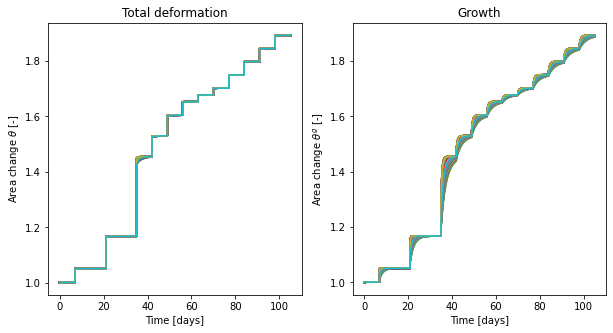

In [68]:
# Plot them all just to see how they look 
fig, ax = plt.subplots(1, 2,figsize=(10,5))
for ni in range(n_input):
    ax[0].plot(time_vec,theta_LF_AnteFace30x60mm38cc[ni,:])
    ax[1].plot(time_vec,thetaG_LF_AnteFace30x60mm38cc[ni,:])
ax[0].set_title('Total deformation')
ax[1].set_title('Growth')
ax[0].set_xlabel('Time [days]')
ax[1].set_xlabel('Time [days]')
ax[0].set_ylabel(r'Area change $\theta$ [-]')
ax[1].set_ylabel(r'Area change $\theta^g$ [-]')

In [69]:
# SAVE data 
np.savetxt('../time_vec_AnteFace30x60mm38cc.txt',time_vec)
np.savetxt('../theta_LF_AnteFace30x60mm38cc.txt',theta_LF_AnteFace30x60mm38cc)
np.savetxt('../thetaG_LF_AnteFace30x60mm38cc.txt',thetaG_LF_AnteFace30x60mm38cc)

## Case 2: Lower face 30x60mm expander, 38ml final volume fill

In [70]:

# Initial parameters [some of them will be overwritten]
d    = 3 # mm, distance between skin surface and bottom of the expander
a_s  = 18 # mm, distance between the center of the expander and the boundary condition, slightly wider than expander
a_b  = 15 # mm, half of width of expander   
mu_b = 20 # MPa, shear modulus of expander https://www.azom.com/properties.aspx?ArticleID=920 
mu_s = 1 # MPa, shear modulus of skin  
h_b  = 1 # mm thickness of expander 
h_s  = 1 # mm thickness of skin 
lam_crit = 1.1567 # prestrain 
# most important 'parameters' are, first thickness and volume at the end 
# more like control variables
t_b  = 60 #mm length of the expander
Vb   = 0 #mm^3 initial volume 
# the other 'parameter' is the growth
lamg = 1 # initial growth 
# Store initial parameters
params = [d, a_s, a_b, mu_b, mu_s, h_b, h_s, t_b, Vb, lamg]

# Inflation protocol
Vb_inflations = [15000,20000,23000,26000,28000,29000,30000,32000,34000,36000,38000,38000]
time_inflations = [0,7,14,21,28,35,42,49,56,63,70,105]
n_inflations = len(time_inflations)
nsteps = 40

# Loop over inputs, run model, save data 
theta_LF_LowerFace30x60mm38cc = np.zeros((n_input,n_inflations*nsteps-nsteps))
thetaG_LF_LowerFace30x60mm38cc = np.zeros((n_input,n_inflations*nsteps-nsteps))
    
for ni in range(n_input):
    # Parameters that need to be reset 
    mu_s = inputs[ni,0]
    kg = inputs[ni,1]

    # initial guess for equilibrium problem 
    c0 = 10 
    thetas0 = np.pi/6
    pA0 = 10
    X0 = [c0,thetas0,pA0]

    # store solution of total deformation and growth
    # for low fidelity, max and average are the same 
    lam_vec = np.zeros((n_inflations*nsteps-nsteps))
    lamg_vec = np.zeros((n_inflations*nsteps-nsteps))
    time_vec = np.zeros((n_inflations*nsteps-nsteps))
    
    # reset growth
    lamg = 1

    for ti in range(len(time_inflations)-1):
        t0 = time_inflations[ti]
        tf = time_inflations[ti+1]
        dt = (tf-t0)/(nsteps-1)
        # update volume in 'params'
        Vb = Vb_inflations[ti]
        # integrate growth
        for step in range(nsteps):
            params = [d, a_s, a_b, mu_b, mu_s, h_b, h_s, t_b, Vb, lamg]
            # solve equilibrium 
            X = fsolve(evalEquilibrium,X0,args=params)
            # evaluate total stretch 
            [Rc,Rb,cb,lamda_b,lamda_s] = evalSolution(X, params)
            # integrate growth 
            if lamda_s*lam_crit/lamg-lam_crit>0:
                lamg = lamg + dt*kg*(lamda_s*lam_crit/lamg-lam_crit)
            # reset initial guess for next loop
            X0 = X
            # store to plot at the end 
            time_vec[ti*nsteps+step] = t0 + dt*step
            lam_vec[ti*nsteps+step] = lamda_s
            lamg_vec[ti*nsteps+step] = lamg
    theta_LF_LowerFace30x60mm38cc[ni,:] = lam_vec
    thetaG_LF_LowerFace30x60mm38cc[ni,:] = lamg_vec

Text(0, 0.5, 'Area change $\\theta^g$ [-]')

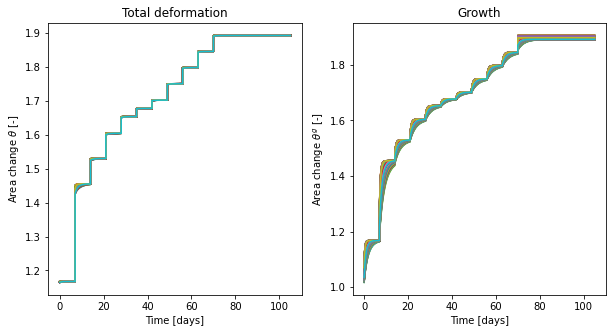

In [71]:
# Plot them all just to see how they look 
fig, ax = plt.subplots(1, 2,figsize=(10,5))
for ni in range(n_input):
    ax[0].plot(time_vec,theta_LF_LowerFace30x60mm38cc[ni,:])
    ax[1].plot(time_vec,thetaG_LF_LowerFace30x60mm38cc[ni,:])
ax[0].set_title('Total deformation')
ax[1].set_title('Growth')
ax[0].set_xlabel('Time [days]')
ax[1].set_xlabel('Time [days]')
ax[0].set_ylabel(r'Area change $\theta$ [-]')
ax[1].set_ylabel(r'Area change $\theta^g$ [-]')

In [72]:
# SAVE data 
np.savetxt('../time_vec_LowerFace30x60mm38cc.txt',time_vec)
np.savetxt('../theta_LF_LowerFace30x60mm38cc.txt',theta_LF_LowerFace30x60mm38cc)
np.savetxt('../thetaG_LF_LowerFace30x60mm38cc.txt',thetaG_LF_LowerFace30x60mm38cc)

## Case 3: Forehead 30x60mm expander, 33ml final volume fill

In [73]:
# Initial parameters [some of them will be overwritten]
d    = 3 # mm, distance between skin surface and bottom of the expander
a_s  = 18 # mm, distance between the center of the expander and the boundary condition, slightly wider than expander
a_b  = 15 # mm, half of width of expander   
mu_b = 20 # MPa, shear modulus of expander https://www.azom.com/properties.aspx?ArticleID=920 
mu_s = 1 # MPa, shear modulus of skin  
h_b  = 1 # mm thickness of expander 
h_s  = 1 # mm thickness of skin 
lam_crit = 1.1567 # prestrain 
# most important 'parameters' are, first thickness and volume at the end 
# more like control variables
t_b  = 60 #mm length of the expander
Vb   = 0 #mm^3 initial volume 
# the other 'parameter' is the growth
lamg = 1 # initial growth 
# Store initial parameters
params = [d, a_s, a_b, mu_b, mu_s, h_b, h_s, t_b, Vb, lamg]

# Inflation protocol
Vb_inflations = [6000,10000,14000,17000,20000,23000,24000,25000,26000,27000,29000,31000,33000,33000]
time_inflations = [0,7,21,35,42,49,56,63,70,77,84,91,98,105]
n_inflations = len(time_inflations)
nsteps = 40

# Loop over inputs, run model, save data 
theta_LF_Forehead30x60mm38cc = np.zeros((n_input,n_inflations*nsteps-nsteps))
thetaG_LF_Forehead30x60mm38cc = np.zeros((n_input,n_inflations*nsteps-nsteps))
    
for ni in range(n_input):
    # Parameters that need to be reset 
    mu_s = inputs[ni,0]
    kg = inputs[ni,1]

    # initial guess for equilibrium problem 
    c0 = 10 
    thetas0 = np.pi/6
    pA0 = 10
    X0 = [c0,thetas0,pA0]

    # store solution of total deformation and growth
    # for low fidelity, max and average are the same 
    lam_vec = np.zeros((n_inflations*nsteps-nsteps))
    lamg_vec = np.zeros((n_inflations*nsteps-nsteps))
    time_vec = np.zeros((n_inflations*nsteps-nsteps))
    
    # reset growth
    lamg = 1

    for ti in range(len(time_inflations)-1):
        t0 = time_inflations[ti]
        tf = time_inflations[ti+1]
        dt = (tf-t0)/(nsteps-1)
        # update volume in 'params'
        Vb = Vb_inflations[ti]
        # integrate growth
        for step in range(nsteps):
            params = [d, a_s, a_b, mu_b, mu_s, h_b, h_s, t_b, Vb, lamg]
            # solve equilibrium 
            X = fsolve(evalEquilibrium,X0,args=params)
            # evaluate total stretch 
            [Rc,Rb,cb,lamda_b,lamda_s] = evalSolution(X, params)
            # integrate growth 
            if lamda_s*lam_crit/lamg-lam_crit>0:
                lamg = lamg + dt*kg*(lamda_s*lam_crit/lamg-lam_crit)
            # reset initial guess for next loop
            X0 = X
            # store to plot at the end 
            time_vec[ti*nsteps+step] = t0 + dt*step
            lam_vec[ti*nsteps+step] = lamda_s
            lamg_vec[ti*nsteps+step] = lamg
    theta_LF_Forehead30x60mm38cc[ni,:] = lam_vec
    thetaG_LF_Forehead30x60mm38cc[ni,:] = lamg_vec

Text(0, 0.5, 'Area change $\\theta^g$ [-]')

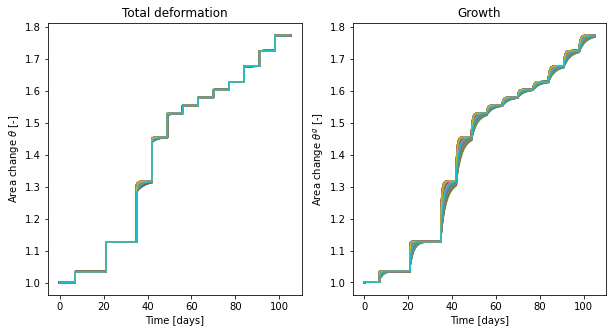

In [74]:
# Plot them all just to see how they look 
fig, ax = plt.subplots(1, 2,figsize=(10,5))
for ni in range(n_input):
    ax[0].plot(time_vec,theta_LF_Forehead30x60mm38cc[ni,:])
    ax[1].plot(time_vec,thetaG_LF_Forehead30x60mm38cc[ni,:])
ax[0].set_title('Total deformation')
ax[1].set_title('Growth')
ax[0].set_xlabel('Time [days]')
ax[1].set_xlabel('Time [days]')
ax[0].set_ylabel(r'Area change $\theta$ [-]')
ax[1].set_ylabel(r'Area change $\theta^g$ [-]')

In [75]:
# SAVE data 
np.savetxt('../time_vec_Forehead30x60mm38cc.txt',time_vec)
np.savetxt('../theta_LF_Forehead30x60mm38cc.txt',theta_LF_Forehead30x60mm38cc)
np.savetxt('../thetaG_LF_Forehead30x60mm38cc.txt',thetaG_LF_Forehead30x60mm38cc)

## Case 4: Posterior scalp 60x120mm, 221ml final fill volume

In [76]:
# Initial parameters [some of them will be overwritten]
d    = 3 # mm, distance between skin surface and bottom of the expander
a_s  = 36 # mm, distance between the center of the expander and the boundary condition, slightly wider than expander
a_b  = 30 # mm, half of width of expander   
mu_b = 20 # MPa, shear modulus of expander https://www.azom.com/properties.aspx?ArticleID=920 
mu_s = 1 # MPa, shear modulus of skin  
h_b  = 1 # mm thickness of expander 
h_s  = 1 # mm thickness of skin 
lam_crit = 1.1567 # prestrain 
# most important 'parameters' are, first thickness and volume at the end 
# more like control variables
t_b  = 120 #mm length of the expander
Vb   = 0 #mm^3 initial volume 
# the other 'parameter' is the growth
lamg = 1 # initial growth 
# Store initial parameters
params = [d, a_s, a_b, mu_b, mu_s, h_b, h_s, t_b, Vb, lamg]

# Inflation protocol
Vb_inflations = [20000,47000,74000,89000,106000,123000,141000,156000,166000,181000,196000,211000,221000,221000]
time_inflations = [0,7,21,35,42,49,56,63,70,77,84,91,98,105]
n_inflations = len(time_inflations)
nsteps = 40

# Loop over inputs, run model, save data 
theta_LF_PostScalp60x120mm221cc = np.zeros((n_input,n_inflations*nsteps-nsteps))
thetaG_LF_PostScalp60x120mm221cc = np.zeros((n_input,n_inflations*nsteps-nsteps))
    
for ni in range(n_input):
    # Parameters that need to be reset 
    mu_s = inputs[ni,0]
    kg = inputs[ni,1]

    # initial guess for equilibrium problem 
    c0 = 10 
    thetas0 = np.pi/6
    pA0 = 10
    X0 = [c0,thetas0,pA0]

    # store solution of total deformation and growth
    # for low fidelity, max and average are the same 
    lam_vec = np.zeros((n_inflations*nsteps-nsteps))
    lamg_vec = np.zeros((n_inflations*nsteps-nsteps))
    time_vec = np.zeros((n_inflations*nsteps-nsteps))
    
    # reset growth
    lamg = 1

    for ti in range(len(time_inflations)-1):
        t0 = time_inflations[ti]
        tf = time_inflations[ti+1]
        dt = (tf-t0)/(nsteps-1)
        # update volume in 'params'
        Vb = Vb_inflations[ti]
        # integrate growth
        for step in range(nsteps):
            params = [d, a_s, a_b, mu_b, mu_s, h_b, h_s, t_b, Vb, lamg]
            # solve equilibrium 
            X = fsolve(evalEquilibrium,X0,args=params)
            # evaluate total stretch 
            [Rc,Rb,cb,lamda_b,lamda_s] = evalSolution(X, params)
            # integrate growth 
            if lamda_s*lam_crit/lamg-lam_crit>0:
                lamg = lamg + dt*kg*(lamda_s*lam_crit/lamg-lam_crit)
            # reset initial guess for next loop
            X0 = X
            # store to plot at the end 
            time_vec[ti*nsteps+step] = t0 + dt*step
            lam_vec[ti*nsteps+step] = lamda_s
            lamg_vec[ti*nsteps+step] = lamg
    theta_LF_PostScalp60x120mm221cc[ni,:] = lam_vec
    thetaG_LF_PostScalp60x120mm221cc[ni,:] = lamg_vec

Text(0, 0.5, 'Area change $\\theta^g$ [-]')

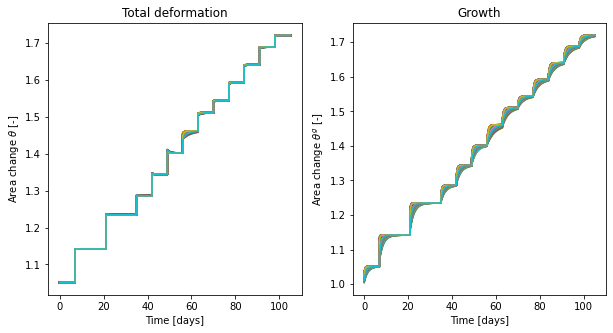

In [77]:
# Plot them all just to see how they look 
fig, ax = plt.subplots(1, 2,figsize=(10,5))
for ni in range(n_input):
    ax[0].plot(time_vec,theta_LF_PostScalp60x120mm221cc[ni,:])
    ax[1].plot(time_vec,thetaG_LF_PostScalp60x120mm221cc[ni,:])
ax[0].set_title('Total deformation')
ax[1].set_title('Growth')
ax[0].set_xlabel('Time [days]')
ax[1].set_xlabel('Time [days]')
ax[0].set_ylabel(r'Area change $\theta$ [-]')
ax[1].set_ylabel(r'Area change $\theta^g$ [-]')

In [78]:
# SAVE data 
np.savetxt('../time_vec_PostScalp60x120mm221cc.txt',time_vec)
np.savetxt('../theta_LF_PostScalp60x120mm221cc.txt',theta_LF_PostScalp60x120mm221cc)
np.savetxt('../thetaG_LF_PostScalp60x120mm221cc.txt',thetaG_LF_PostScalp60x120mm221cc)

## Case 5: Anterior scalp 'crescent' 50x130mm, 243ml final fill volume

There is no 'crescent' for the analytical model, will be modeled as a rectangular expander! 


In [79]:
# Initial parameters [some of them will be overwritten]
d    = 3 # mm, distance between skin surface and bottom of the expander
a_s  = 28 # mm, distance between the center of the expander and the boundary condition, slightly wider than expander
a_b  = 25 # mm, half of width of expander   
mu_b = 20 # MPa, shear modulus of expander https://www.azom.com/properties.aspx?ArticleID=920 
mu_s = 1 # MPa, shear modulus of skin  
h_b  = 1 # mm thickness of expander 
h_s  = 1 # mm thickness of skin 
lam_crit = 1.1567 # prestrain 
# most important 'parameters' are, first thickness and volume at the end 
# more like control variables
t_b  = 130 #mm length of the expander
Vb   = 0 #mm^3 initial volume 
# the other 'parameter' is the growth
lamg = 1 # initial growth 
# Store initial parameters
params = [d, a_s, a_b, mu_b, mu_s, h_b, h_s, t_b, Vb, lamg]

# Inflation protocol
Vb_inflations = [20000,47000,74000,97000,124000,142000,157000,172000,188000,203000,218000,233000,243000,243000]
time_inflations = [0,7,21,35,42,49,56,63,70,77,84,91,98,105]
n_inflations = len(time_inflations)
nsteps = 40

# Loop over inputs, run model, save data 
theta_LF_AnteScalp50x130mm243cc = np.zeros((n_input,n_inflations*nsteps-nsteps))
thetaG_LF_AnteScalp50x130mm243cc = np.zeros((n_input,n_inflations*nsteps-nsteps))
    
for ni in range(n_input):
    # Parameters that need to be reset 
    mu_s = inputs[ni,0]
    kg = inputs[ni,1]

    # initial guess for equilibrium problem 
    c0 = 10 
    thetas0 = np.pi/6
    pA0 = 10
    X0 = [c0,thetas0,pA0]

    # store solution of total deformation and growth
    # for low fidelity, max and average are the same 
    lam_vec = np.zeros((n_inflations*nsteps-nsteps))
    lamg_vec = np.zeros((n_inflations*nsteps-nsteps))
    time_vec = np.zeros((n_inflations*nsteps-nsteps))
    
    # reset growth
    lamg = 1

    for ti in range(len(time_inflations)-1):
        t0 = time_inflations[ti]
        tf = time_inflations[ti+1]
        dt = (tf-t0)/(nsteps-1)
        # update volume in 'params'
        Vb = Vb_inflations[ti]
        # integrate growth
        for step in range(nsteps):
            params = [d, a_s, a_b, mu_b, mu_s, h_b, h_s, t_b, Vb, lamg]
            # solve equilibrium 
            X = fsolve(evalEquilibrium,X0,args=params)
            # evaluate total stretch 
            [Rc,Rb,cb,lamda_b,lamda_s] = evalSolution(X, params)
            # integrate growth 
            if lamda_s*lam_crit/lamg-lam_crit>0:
                lamg = lamg + dt*kg*(lamda_s*lam_crit/lamg-lam_crit)
            # reset initial guess for next loop
            X0 = X
            # store to plot at the end 
            time_vec[ti*nsteps+step] = t0 + dt*step
            lam_vec[ti*nsteps+step] = lamda_s
            lamg_vec[ti*nsteps+step] = lamg
    theta_LF_AnteScalp50x130mm243cc[ni,:] = lam_vec
    thetaG_LF_AnteScalp50x130mm243cc[ni,:] = lamg_vec

Text(0, 0.5, 'Area change $\\theta^g$ [-]')

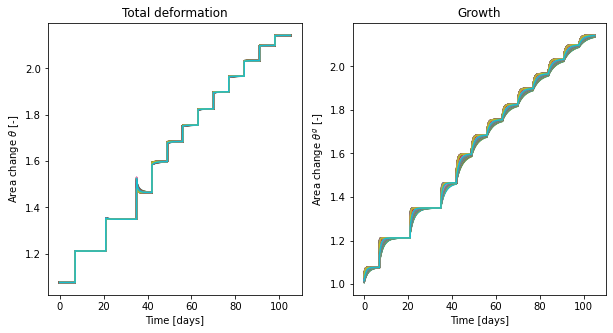

In [80]:
# Plot them all just to see how they look 
fig, ax = plt.subplots(1, 2,figsize=(10,5))
for ni in range(n_input):
    ax[0].plot(time_vec,theta_LF_AnteScalp50x130mm243cc[ni,:] )
    ax[1].plot(time_vec,thetaG_LF_AnteScalp50x130mm243cc[ni,:])
ax[0].set_title('Total deformation')
ax[1].set_title('Growth')
ax[0].set_xlabel('Time [days]')
ax[1].set_xlabel('Time [days]')
ax[0].set_ylabel(r'Area change $\theta$ [-]')
ax[1].set_ylabel(r'Area change $\theta^g$ [-]')

In [81]:
# SAVE data 
np.savetxt('../time_vec_AnteScalp50x130mm243cc.txt',time_vec)
np.savetxt('../theta_LF_AnteScalp50x130mm243cc.txt',theta_LF_AnteScalp50x130mm243cc)
np.savetxt('../thetaG_LF_AnteScalp50x130mm243cc.txt',thetaG_LF_AnteScalp50x130mm243cc)

## Case 6: Left calvicular 50x100mm, 133ml final fill volume

In [82]:
# Initial parameters [some of them will be overwritten]
d    = 3 # mm, distance between skin surface and bottom of the expander
a_s  = 28 # mm, distance between the center of the expander and the boundary condition, slightly wider than expander
a_b  = 25 # mm, half of width of expander   
mu_b = 20 # MPa, shear modulus of expander https://www.azom.com/properties.aspx?ArticleID=920 
mu_s = 1 # MPa, shear modulus of skin  
h_b  = 1 # mm thickness of expander 
h_s  = 1 # mm thickness of skin 
lam_crit = 1.1567 # prestrain 
# most important 'parameters' are, first thickness and volume at the end 
# more like control variables
t_b  = 100 #mm length of the expander
Vb   = 0 #mm^3 initial volume 
# the other 'parameter' is the growth
lamg = 1 # initial growth 
# Store initial parameters
params = [d, a_s, a_b, mu_b, mu_s, h_b, h_s, t_b, Vb, lamg]

# Inflation protocol
Vb_inflations = [8000,18000,38000,58000,78000,94000,109000,123000,126000,128000,133000,133000]
time_inflations = [0,7,14,21,28,35,42,49,56,70,91,105]
n_inflations = len(time_inflations)
nsteps = 40

# Loop over inputs, run model, save data 
theta_LF_LeftClav50x100mm133cc = np.zeros((n_input,n_inflations*nsteps-nsteps))
thetaG_LF_LeftClav50x100mm133cc = np.zeros((n_input,n_inflations*nsteps-nsteps))
    
for ni in range(n_input):
    # Parameters that need to be reset 
    mu_s = inputs[ni,0]
    kg = inputs[ni,1]

    # initial guess for equilibrium problem 
    c0 = 10 
    thetas0 = np.pi/6
    pA0 = 10
    X0 = [c0,thetas0,pA0]

    # store solution of total deformation and growth
    # for low fidelity, max and average are the same 
    lam_vec = np.zeros((n_inflations*nsteps-nsteps))
    lamg_vec = np.zeros((n_inflations*nsteps-nsteps))
    time_vec = np.zeros((n_inflations*nsteps-nsteps))
    
    # reset growth
    lamg = 1

    for ti in range(len(time_inflations)-1):
        t0 = time_inflations[ti]
        tf = time_inflations[ti+1]
        dt = (tf-t0)/(nsteps-1)
        # update volume in 'params'
        Vb = Vb_inflations[ti]
        # integrate growth
        for step in range(nsteps):
            params = [d, a_s, a_b, mu_b, mu_s, h_b, h_s, t_b, Vb, lamg]
            # solve equilibrium 
            X = fsolve(evalEquilibrium,X0,args=params)
            # evaluate total stretch 
            [Rc,Rb,cb,lamda_b,lamda_s] = evalSolution(X, params)
            # integrate growth 
            if lamda_s*lam_crit/lamg-lam_crit>0:
                lamg = lamg + dt*kg*(lamda_s*lam_crit/lamg-lam_crit)
            # reset initial guess for next loop
            X0 = X
            # store to plot at the end 
            time_vec[ti*nsteps+step] = t0 + dt*step
            lam_vec[ti*nsteps+step] = lamda_s
            lamg_vec[ti*nsteps+step] = lamg
    theta_LF_LeftClav50x100mm133cc[ni,:] = lam_vec
    thetaG_LF_LeftClav50x100mm133cc[ni,:] = lamg_vec

Text(0, 0.5, 'Area change $\\theta^g$ [-]')

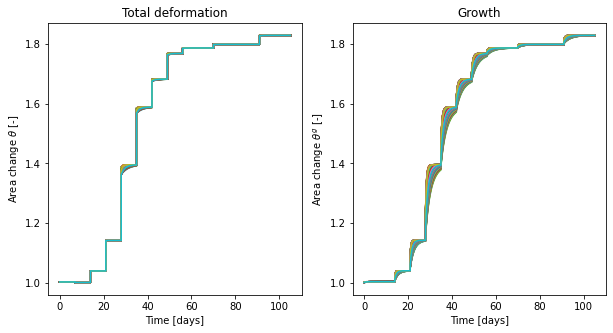

In [83]:
# Plot them all just to see how they look 
fig, ax = plt.subplots(1, 2,figsize=(10,5))
for ni in range(n_input):
    ax[0].plot(time_vec,theta_LF_LeftClav50x100mm133cc[ni,:] )
    ax[1].plot(time_vec,thetaG_LF_LeftClav50x100mm133cc[ni,:] )
ax[0].set_title('Total deformation')
ax[1].set_title('Growth')
ax[0].set_xlabel('Time [days]')
ax[1].set_xlabel('Time [days]')
ax[0].set_ylabel(r'Area change $\theta$ [-]')
ax[1].set_ylabel(r'Area change $\theta^g$ [-]')

In [84]:
# SAVE data 
np.savetxt('../time_vec_LeftClav50x100mm133cc.txt',time_vec)
np.savetxt('../theta_LF_LeftClav50x100mm133cc.txt',theta_LF_LeftClav50x100mm133cc)
np.savetxt('../thetaG_LF_LeftClav50x100mm133cc.txt',thetaG_LF_LeftClav50x100mm133cc)

In [40]:
i=-1
n_tpts = np.array([14,12,14,14,14,12])
tpts = np.linspace(0,(n_tpts[i]-1)*40,n_tpts[i])
tpts[-1] -= 1
tpts

array([  0.,  40.,  80., 120., 160., 200., 240., 280., 320., 360., 400.,
       439.])

array([  0.,  40.,  80., 120., 160., 200., 240., 280., 320., 360., 400.,
       440., 480., 519.])